In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sn 
from torchvision import datasets
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import fetch_openml

In [2]:
mnist_data = datasets.MNIST(root="dataset/", download=True)
labels = mnist_data.targets.numpy()
dataset = mnist_data.data.numpy().reshape(-1,784).T

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



In [3]:
# (a) SVD of the digit images
U, S, Vt = np.linalg.svd(dataset, full_matrices=False)


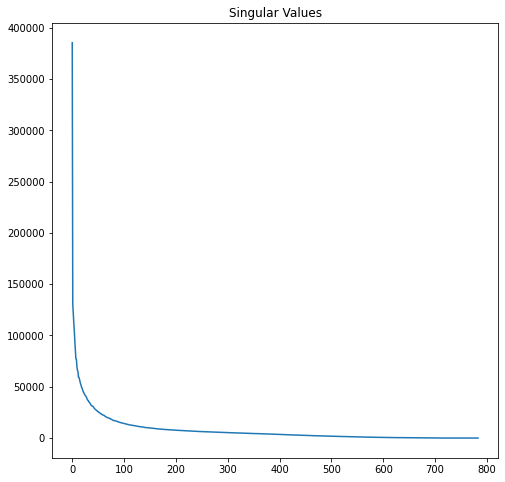

<Figure size 576x576 with 0 Axes>

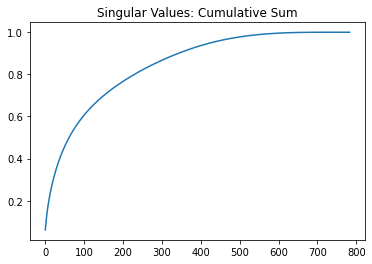

In [15]:
#(b) Singular value spectrum
plt.figure(figsize=(8,8))

plt.figure(1)
plt.plot(S)
plt.title('Singular Values')
plt.show()

plt.figure(figsize=(8,8))

plt.figure(2)
plt.plot(np.cumsum(S)/np.sum(S))
plt.title('Singular Values: Cumulative Sum')
plt.show()

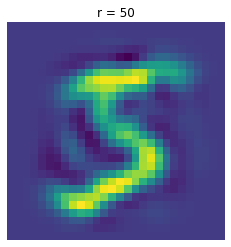

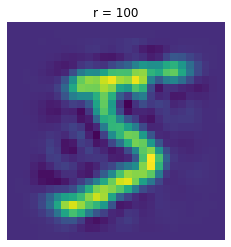

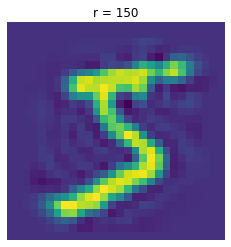

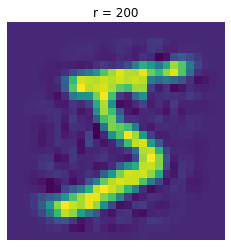

In [5]:
#image reconstruction

j = 0
for r in (50, 100, 150, 200):
    # Construct approximate image
    Xapprox = ((U[:,:r] @ np.diag(S)[0:r,:r] @ Vt[:r,:]) [:,0].reshape(28,28))
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    #img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

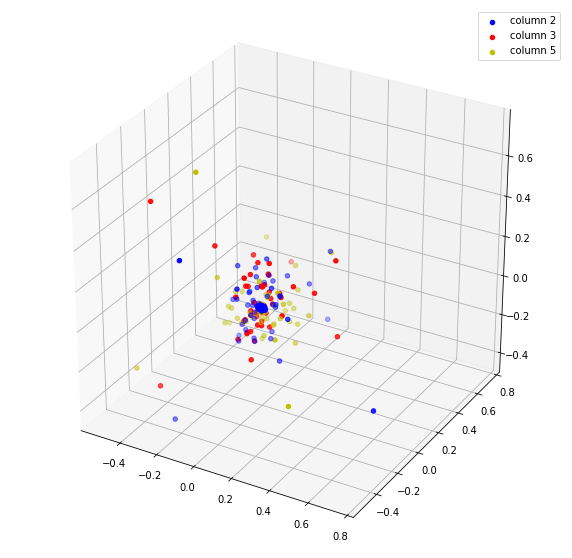

In [7]:
#(d)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(Vt[:,2],Vt[:,3],Vt[:,5], c='b', label='column 2')
ax.scatter(Vt[:,3],Vt[:,2],Vt[:,5], c='r', label='column 3')
ax.scatter(Vt[:,5],Vt[:,3],Vt[:,2], c='y', label='column 5')

ax.legend()

In [8]:
#(e) pick two digits

two_d= (labels==1)+(labels==5)
two_d_x, two_d_y = dataset[:,two_d], labels[two_d]
x_train, x_test, y_train, y_test = train_test_split(two_d_x.T, two_d_y)

LDA= LinearDiscriminantAnalysis()

LDA1 = LDA.fit(x_train, y_train)
test_labels = LDA.predict(x_test)
LDA.ac = accuracy_score(y_test,test_labels)
print(LDA.ac)

0.9842157185136469


In [9]:
#(f) pick three digits

three_d= (labels==1)+(labels==5)+(labels==7)
three_d_x, three_d_y = dataset[:,three_d], labels[three_d]
x_train, x_test, y_train, y_test = train_test_split(three_d_x.T, three_d_y)

LDA1 = LDA.fit(x_train, y_train)
test_labels = LDA.predict(x_test)
LDA.ac = accuracy_score(y_test,test_labels)
print(LDA.ac)

0.9754721076622531


In [10]:
#(g) pick all digits to check for separating difficulty

x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(dataset.T, labels)

LDA1 = LDA.fit(x_train_all, y_train_all)
test_labels_all = LDA.predict(x_test_all)
LDA.ac = accuracy_score(y_test_all,test_labels_all)
print(LDA.ac)

0.8639333333333333


In [11]:
#(g,h) pick two digits
print("digit1 digit2 LDA accuracy")
for j in range(0,10):
  for r in range(0,10):
    two_d= (labels==j)+(labels==r)
    two_d_x, two_d_y = dataset[:,two_d], labels[two_d]
    x_train, x_test, y_train, y_test = train_test_split(two_d_x.T, two_d_y)
    
    LDA= LinearDiscriminantAnalysis()
    LDA1 = LDA.fit(x_train, y_train)
    test_labels = LDA.predict(x_test)
    LDA.ac = accuracy_score(y_test,test_labels)
    print(j,r, LDA.ac)

digit1 digit2 LDA accuracy
0 0 1.0
0 1 0.9921060940953584
0 2 0.9861999326825984
0 3 0.9883875248838753
0 4 0.990482664853841
0 5 0.9823695345557123
0 6 0.9858156028368794
0 7 0.9960617000328191
0 8 0.984375
0 9 0.9912398921832885
1 0 0.9927376065677297
1 1 1.0
1 2 0.9782677165354331
1 3 0.9841565703634669
1 4 0.9936427209154481
1 5 0.9898059848733969
1 6 0.9924170616113744
1 7 0.9861623616236163
1 8 0.9647507145125437
1 9 0.9927513394264104
2 0 0.985863345674857
2 1 0.9833070866141732
2 2 1.0
2 3 0.969897452861396
2 4 0.9816949152542372
2 5 0.9739894551845343
2 6 0.9744021556079488
2 7 0.9826570680628273
2 8 0.9610565526583136
2 9 0.9811891165602956
3 0 0.9927007299270073
3 1 0.9798073936004971
3 2 0.968905061197486
3 3 1.0
3 4 0.9846359385437542
3 5 0.9490997229916898
3 6 0.9873879853966147
3 7 0.9825750242013552
3 8 0.9586114819759679
3 9 0.9801324503311258
4 0 0.9915023793337865
4 1 0.9939605848696758
4 2 0.9769491525423729
4 3 0.9909819639278558
4 4 1.0
4 5 0.9857954545454546
4 6 

In [12]:
#(i) SVM and DTC on all 10 digits

x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(dataset.T, labels)

svm = SVC(probability=False)
dtc = DecisionTreeClassifier()

test_svm=svm.fit(x_train_all, y_train_all)
test_labels_svm = test_svm.predict(x_test_all)
svm.ac=accuracy_score(y_test_all,test_labels_svm)
print(svm.ac)


test_dtc=dtc.fit(x_train_all, y_train_all)
test_labels_dtc = test_dtc.predict(x_test_all)
dtc.ac=accuracy_score(y_test_all,test_labels_dtc)
print(dtc.ac)

0.9784666666666667
0.8653333333333333


In [13]:
#(j) on hardest digits
two_d= (labels==3)+(labels==5)
two_d_x, two_d_y = dataset[:,two_d], labels[two_d]
x_train, x_test, y_train, y_test = train_test_split(two_d_x.T, two_d_y)

LDA1 = LDA.fit(x_train, y_train)
test_labels = LDA.predict(x_test)
LDA.ac = accuracy_score(y_test,test_labels)
print(LDA.ac)

test_svm=svm.fit(x_train, y_train)
test_labels_svm = test_svm.predict(x_test)
svm.ac=accuracy_score(y_test,test_labels_svm)
print(svm.ac)

test_dtc=dtc.fit(x_train, y_train)
test_labels_dtc = test_dtc.predict(x_test)
dtc.ac=accuracy_score(y_test,test_labels_dtc)
print(dtc.ac)

0.9490997229916898
0.9906509695290858
0.9463296398891967


In [16]:
#(j) on easiest digits
two_d= (labels==6)+(labels==7)
two_d_x, two_d_y = dataset[:,two_d], labels[two_d]
x_train, x_test, y_train, y_test = train_test_split(two_d_x.T, two_d_y)

LDA1 = LDA.fit(x_train, y_train)
test_labels = LDA.predict(x_test)
LDA.ac = accuracy_score(y_test,test_labels)
print(LDA.ac)

test_svm=svm.fit(x_train, y_train)
test_labels_svm = test_svm.predict(x_test)
svm.ac=accuracy_score(y_test,test_labels_svm)
print(svm.ac)

test_dtc=dtc.fit(x_train, y_train)
test_labels_dtc = test_dtc.predict(x_test)
dtc.ac=accuracy_score(y_test,test_labels_dtc)
print(dtc.ac)                                                  

0.9957321076822062
0.5082074852265266
0.5091923834537098
